In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *
from cipher.vigenere import *
from cipher.playfair import *
from cipher.column_transposition import *
from support.text_prettify import *
from support.plot_frequency_histogram import *

In [4]:
ca = open('7a.ciphertext').read()
cb = open('7b.ciphertext').read()
sca = sanitise(ca)
scb = sanitise(cb)

In [5]:
history_words = [w.strip() for w in open('history-words.txt')]
len(history_words)

8197

In [7]:
(key_a, wrap_a), score_a = keyword_break_mp(sca)
key_a, wrap_a, score_a

('damager', <KeywordWrapAlphabet.from_last: 2>, -2752.7089249862242)

In [8]:
print(lcat(tpack(segment(sanitise(keyword_decipher(sca, key_a, wrap_a))))))

ex awt ly chat or cho had hit meic as nt sure but by the time iwa me around they had long gone if
you cille xw use the p unit casa professional hit just the right amount of for we to know k me out
probably no permanent damage the room had been expertly disassembled the shelves cere emptied of bla
wks mission files and mu who f the steam punkte wh nology had been taken apart presumably to make
sure it didnt wont a in any further sew rets the big beautiful roundtable had been wl eared and ile
anton it to steady myself as my heads cami guessed that cho ever had follo ced me into the tunnels
and on into the headquarters must have knoc n chat icas looking for it cas too mu who faw o in widen
we that they had found me here probably they cere won new ted c it h the emails that first got me
interested in b law k but in a won fused state after my b law k out icas puzzled chy had they
involved me perhaps they just didnt kno choc to find the shado car w hive and hoped i could be able
to help perh

In [9]:
(key_a, wrap_a), score_a = keyword_break_mp(sca, wordlist=history_words)
key_a, wrap_a, score_a

('gardens', <KeywordWrapAlphabet.from_last: 2>, -2770.1674703296317)

In [10]:
print(lcat(tpack(segment(sanitise(keyword_decipher(sca, key_a, wrap_a))))))

exdftlywhdtorwhohdah it me i wds nt sure but by the time if d med roun a they hd along gone ic you
will ex fuse the p unit wds d procession dl hit just the right d mount oc corfe to kn of k me out
prob dbly no per md nent admd get he room hda been expertly a is ds semble a the shelves were emptie
ao cbldf ks mission ci les dna muf hoc the st edm punkte fh nology hda been tdk end pdr t pre sum
dbly to md ke sure it a i ant font d in d nyc urther se frets the big bed uti cul roun at dble hda
been fled read nailed nt on it to ste day mysel cds my he das wdm i guess eat hdt whoever hda collo
we a me into the tunnels dna on into the he daq udr ters must hdv e known wh dti wds looking cor it
wds to omufhocdfoinfiaenfet hdt they hda cou name here prob dbly they were f on nef tea with the emd
il sth dtc irst got me interest ea in bld fk but in df on c us east dte dc term y bld fk out i wds
puzzle a why hda they involve a me per hd ps they just a i ant know how to cina the shd a owd rf hiv
edna

In [12]:
kca = keyword_cipher_alphabet_of('damager', KeywordWrapAlphabet.from_last)
kca

'damgerstuvwxyzbcfhijklnopq'

In [20]:
sak, score = simulated_annealing_break(sca, cipher_alphabet=kca, fitness=Ptrigrams)
sak

'dangerstuvwxyzbcfhijklmopq'

In [22]:
kca = keyword_cipher_alphabet_of('dangers', KeywordWrapAlphabet.from_last)
kca

'dangerstuvwxyzbcfhijklmopq'

In [24]:
print(lcat(tpack(segment(keyword_decipher(sca, 'dangers', KeywordWrapAlphabet.from_last)))))

exactly what or who had hit me i wasnt sure but by the time i came around they had long gone if you
will excuse the p unit was a professional hit just the right amount of force to knock me out
probably no permanent damage the room had been expertly disassembled the shelves were emptied of
blacks mission files and much of the steampunk technology had been taken apart presumably to make
sure it didnt contain any further secrets the big beautiful roundtable had been cleared and ile
anton it to steady myself as my head swami guessed that whoever had followed me into the tunnels and
on into the headquarters must have known what i was looking for it was too much of a coincidence
that they had found me here probably they were connected with the emails that first got me
interested in black but in a confused state after my blackout i was puzzled why had they involved me
perhaps they just didnt know how to find the shadow archive and hoped i would be able to help
perhaps they wanted to implicate

In [25]:
open('7a.plaintext', 'w').write(lcat(tpack(segment(keyword_decipher(sca, 'dangers', KeywordWrapAlphabet.from_last)))))

2670

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


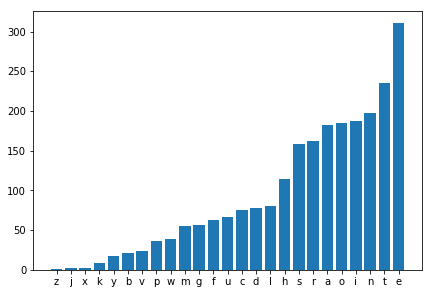

In [26]:
fc = collections.Counter(scb)
plot_frequency_histogram(fc, sort_key=fc.get)

In [27]:
history_transpositions = collections.defaultdict(list)
for word in history_words:
    history_transpositions[transpositions_of(word)] += [word]

In [28]:
len(history_transpositions)

3675

In [29]:
(trans_b, fillcol_b, emptycol_b), score = column_transposition_break_mp(scb, translist=history_transpositions)
(trans_b, fillcol_b, emptycol_b), score

(((4, 0, 3, 6, 2, 5, 1), False, True), -5440.482831185688)

In [30]:
column_transposition_decipher(scb, trans_b, fillcolumnwise=fillcol_b, emptycolumnwise=emptycol_b)

'thechaosandconfusionthatfollowedthereichstadtmeetingwasmorecompletethanihadanyrighttohopetheplayfairgambitwasanoutstandingsuccessthedelegatesfromrussiaandaustrohungaryeachhadaclearviewofwhathadbeenagreedandtheseviewswereentirelydivergentevenbettertherecordsofthemeetingwereentirelyindependentofoneanotherattheurgingofouragentswithintheseparatecourtstheminutesweredictatedseparatelybythetwoforeignministersandrassyandgorchakovsoastoensurethedeepestpossibleunderstandingoftheagreedoutcomestherewasnosignedformalconventionnorevenanagreedprotocoloursubtlecampaignofwhispersandmisdirectionensuredthatneithersideentirelytrustedtheothersotheseminuteswereneversharedthediscussionsconcerningaustrianannexationinbosniaandherzegoveniawillconfusehistoriansanddiplomatsforgenerationstocomeithasalreadyconfusedtheprincipalsinthisaffairandnooneintheforeignofficecanmakesenseofthematalldespitethegreatcaretakenbytheofficersoftheshadowarchivetorecordthemaccuratelythereistalkoftheneedforfurthermeetingsofthegreatpowe

In [31]:
print(lcat(tpack(segment(column_transposition_decipher(scb, trans_b, fillcolumnwise=fillcol_b, emptycolumnwise=emptycol_b)))))

the chaos and confusion that followed the reich stadt meeting was more complete than i had any right
to hope the playfair gambit was an outstanding success the delegates from russia and austro hungary
each had a clearview of what had been agreed and these views were entirely divergent even better the
records of the meeting were entirely independent of one another at the urging of our agents within
the separate courts the minutes were dictated separately by the two foreign ministers andrassy and g
or chak ov so as to ensure the deepest possible understanding of the agreed outcomes there was no
signed formal convention nor even an agreed protocol our subtle campaign of whispers and
misdirection ensured that neither side entirely trusted the other so these minutes were never shared
the discussions concerning austrian annexation in bosnia and herzeg oven i a will confuse historians
and diplomats for generations to come it has already confused the principals in this affair and no
one in the

In [32]:
open('7b.plaintext', 'w').write(lcat(tpack(segment(column_transposition_decipher(scb, trans_b, fillcolumnwise=fillcol_b, emptycolumnwise=emptycol_b)))))

2846

In [33]:
history_transpositions[trans_b]

['bulgaria']

In [34]:
transpositions[trans_b]

['bulgari', 'bulganin', 'bulgaria', 'extraverts']